In [1]:
import numpy as np 
import pandas as pd 
import random
import os
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd
from tqdm import tqdm

plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 16
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

# Recognition of Urdu Words
<div class='alert alert-info'><strong>Speech recognition</strong>, in general also known as automatic speech recognition (ASR), computer speech recognition, or speech-to-text, is a capability which enables a program to process human speech into a written format.
</div>

- Recognition of speech in languages native to some country can be a challenging task due to the different accents, dialects and pronunciations.
- This problem accounts for acoustic modelling that can take audio speech signals as input and model its text output based on some feature extraction method that captures the variations in the way a word can be spoken.
- In this kernel I have used MFCC features of audio inputs to build simple models that can classify the 1 second long audio files (in Urdu) into their respective texts.

<img src='https://geekflare.com/wp-content/uploads/2022/02/speechtotextapi.png'>

In [2]:
audio_files = ["%03d"%i+".wav" for i in [1,2,3,4,5,6,7,8,9,10,15,16,17,18,19]]

# Urdu Words
- Their respective codes in the dataset
- Their English Meanings
- This dataset contains 250 words spoken by 10 different speakers each. Out of the 250 words 15 words have been taken for analysis. 

| Code | Urdu Word | English Meaning
| --- | --- | --- |
| 001 | "Sifar" | Zero |
| 002 | "Ek" | One |
| 003 | "Do" | Two |
| 004 | "Teen" | Three |
| 005 | "Chaar" | Four |
| 006 | "Paanch" | Five |
| 007 | "Che" | Six |
| 008 | "Saath" | Seven |
| 009 | "Aath" | Eight |
| 010 | "Nau" | Nine |
| 015 | "Mangal" | Tuesday |
| 016 | "Budh" | Wednesday
| 017 | "Jumeraat" | Thursday |
| 018 | "Subah" | Morning |
| 019 | "Dopahar" | Afternoon |

# Data Preparation
- Lets create a dataframe that will contain all the meta data
- I have taken 15 words to perform this recognition task (refer to the table above)
- For the 15 words, the following information has been taken:
    - the audio file paths of the 10 different speakers
    - the word itself as a label
    - speaker identity
    - Gender
    - Age Group
    - Whether the speaker is a Native Urdu speaker or not

In [3]:
directory = '../input/urdu-speech-dataset/files'
records = []
for speaker in os.listdir(directory):
    path_dir = os.path.join(directory,speaker)
    try:
        for filename in os.listdir(path_dir):
            pattern = re.findall('\d\d\d.wav',filename)[0]
            label = re.findall('\d+',pattern)[0]
            gender = speaker[2]
            age_group = speaker[4:]
            native = speaker[3]
            person = speaker[:2]
            if pattern in audio_files:
                records.append([person,os.path.join(path_dir,filename),label,gender,age_group,native])
    except NotADirectoryError:
        pass
    
data = pd.DataFrame(records,columns=['speaker','filepath','label','gender','age_group','native'])
data['label'] = data['label'].astype(int)
data

,speaker,filepath,label,gender,age_group,native
0,AJ,../input/urdu-speech-dataset/files/AJMNG2/AJMN...,17,M,G2,N
1,AJ,../input/urdu-speech-dataset/files/AJMNG2/AJMN...,6,M,G2,N
2,AJ,../input/urdu-speech-dataset/files/AJMNG2/AJMN...,19,M,G2,N
3,AJ,../input/urdu-speech-dataset/files/AJMNG2/AJMN...,18,M,G2,N
4,AJ,../input/urdu-speech-dataset/files/AJMNG2/AJMN...,10,M,G2,N
...,...,...,...,...,...,...
145,AC,../input/urdu-speech-dataset/files/ACMNG2/ACMN...,4,M,G2,N
146,AC,../input/urdu-speech-dataset/files/ACMNG2/ACMN...,16,M,G2,N
147,AC,../input/urdu-speech-dataset/files/ACMNG2/ACMN...,6,M,G2,N
148,AC,../input/urdu-speech-dataset/files/ACMNG2/ACMN...,17,M,G2,N


In [4]:
def show_waveplot(audio_path,label):
    x , sr = librosa.load(audio_path)
    plt.figure(figsize=(20, 6))
    librosa.display.waveshow(x, sr=sr)
    plt.title(f"Waveplot: of Class: {label}")

def show_spectrogram(audio_path,label):
    x , sr = librosa.load(audio_path)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20,6))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz',cmap='plasma')
    plt.colorbar()
    plt.title(f"Spectrogram of Class: {label}")
    
def show_zcr(audio_path,label):
    x , sr = librosa.load(audio_path)
    zero_crossings = librosa.zero_crossings(x)
    plt.figure(figsize=(20, 6))
    plt.title(f'Zero Crossing Rate of Class: {label}')
    zcrs = librosa.feature.zero_crossing_rate(x)
    plt.plot(zcrs[0])
    plt.show()

# Visualization
- Lets look at some visualizations based on the meta data that I have created as well as the time and frequency domain visualizations of the audio files

## Meta Data Visualization

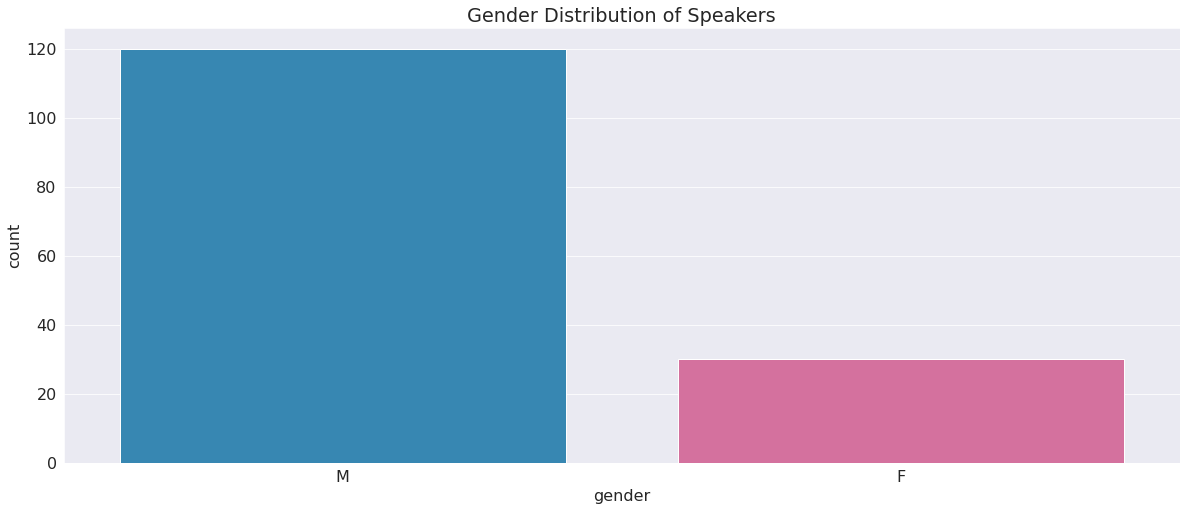

In [5]:
sns.countplot(data=data,x='gender',palette=['#238DC6','#E5609C'])
plt.title("Gender Distribution of Speakers")
plt.show()

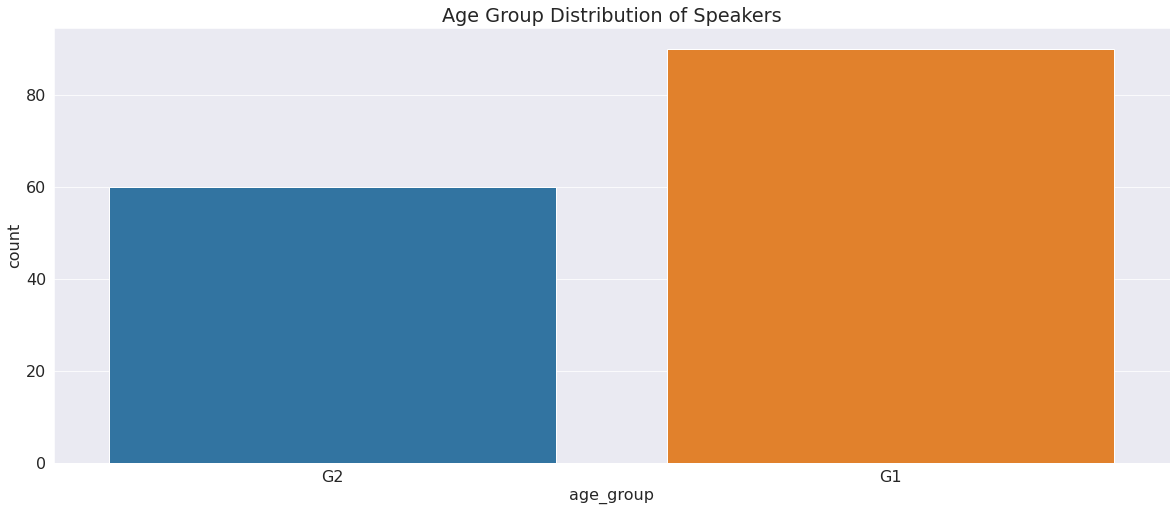

In [6]:
sns.countplot(data=data,x='age_group')
plt.title("Age Group Distribution of Speakers")
plt.show()

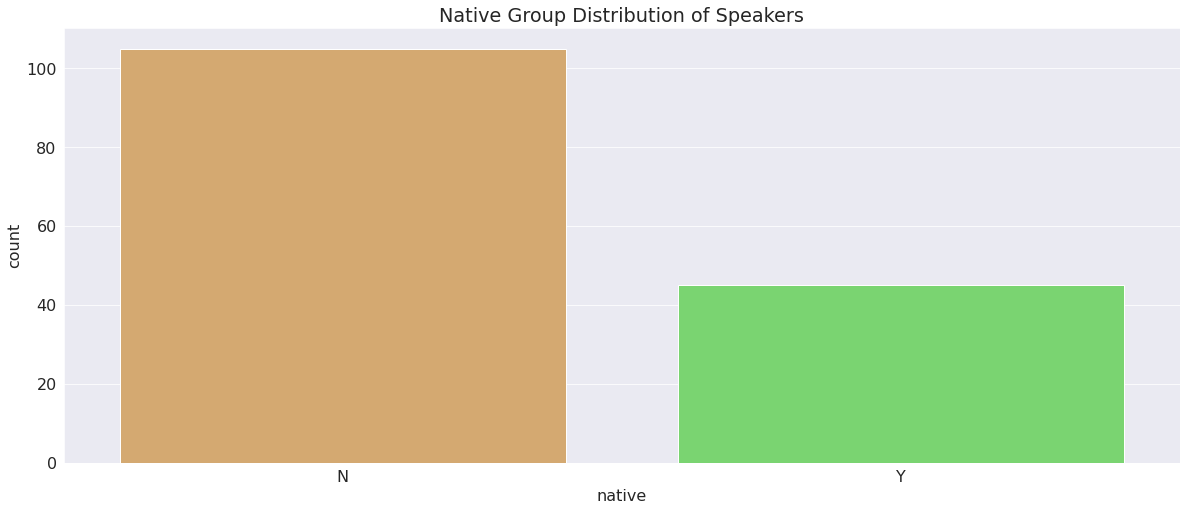

In [7]:
sns.countplot(data=data,x='native',palette=['#E5AB60','#6CE560'])
plt.title("Native Group Distribution of Speakers")
plt.show()

## Audio Data Visualization

<div class='alert alert-info'><strong>Note:</strong> Here since I have taken only one sample from each category, it wouldn't be possible to observe any obvious differences in patterns. But lets try to identify if there are any noticeable differences by looking at the spectral visualizations.</div>

## Gender Samples

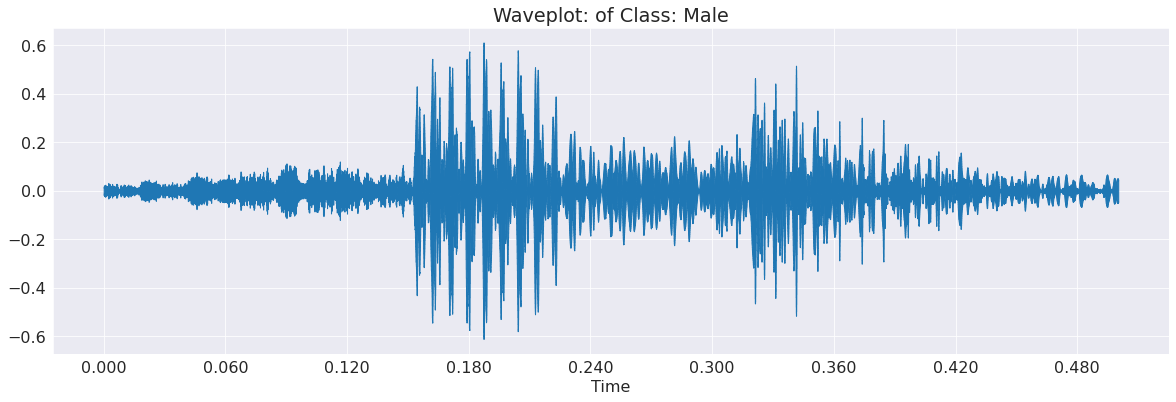

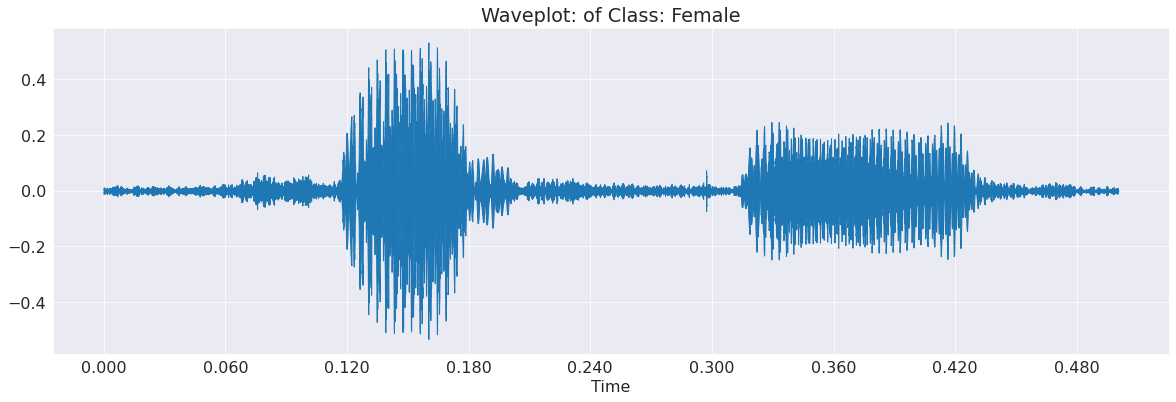

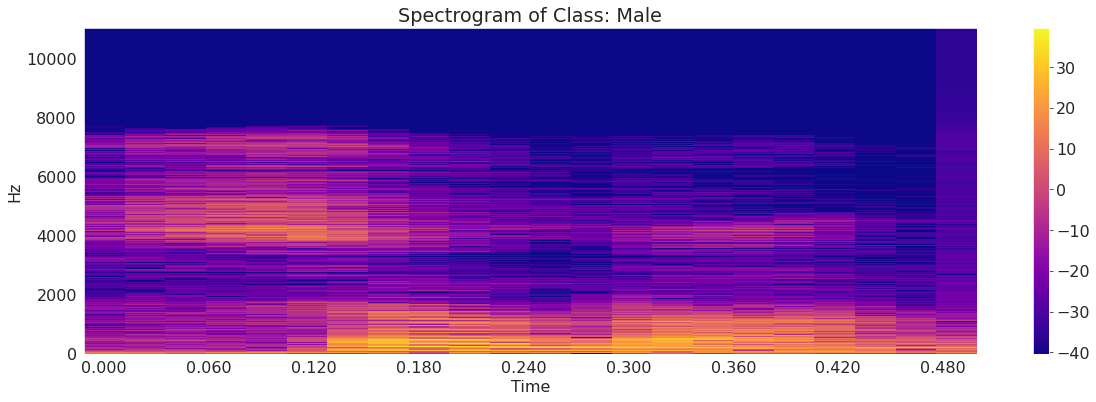

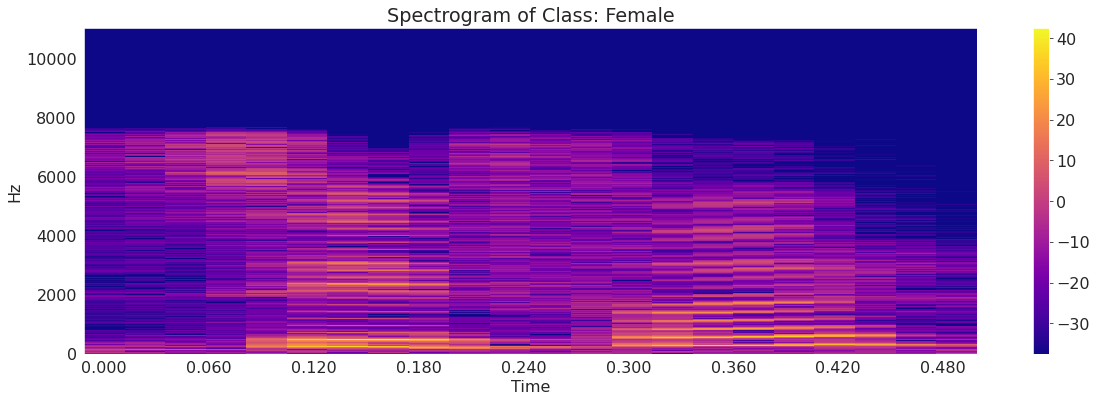

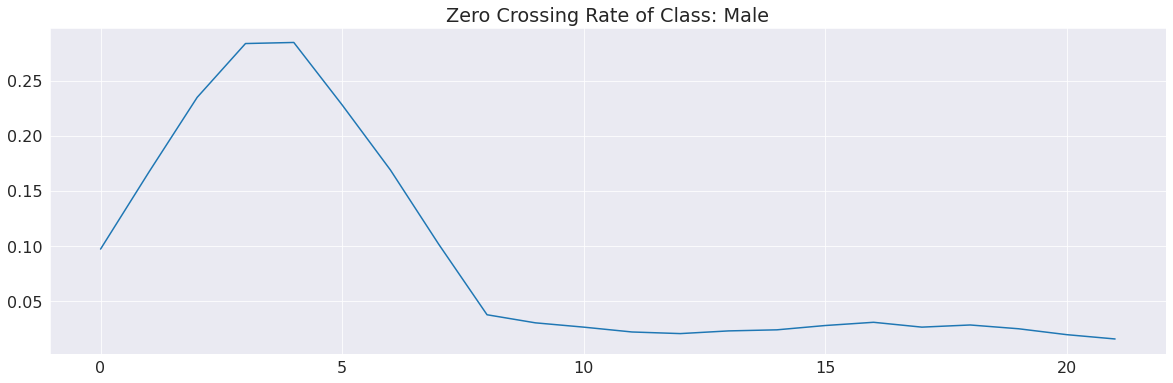

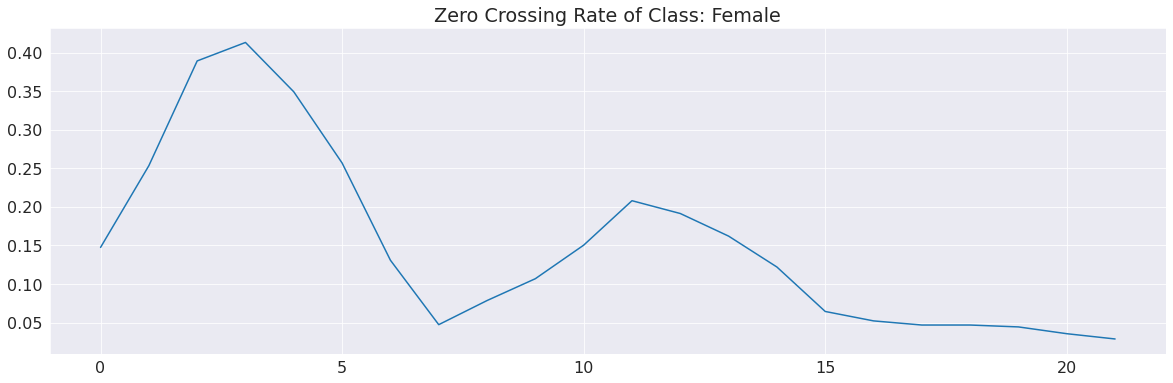

In [8]:
sample1 = data[data['gender']=='M'].sample(1).iloc[0].filepath
sample2 = data[data['gender']=='F'].sample(1).iloc[0].filepath

show_waveplot(sample1,'Male')
show_waveplot(sample2,'Female')

show_spectrogram(sample1,'Male')
show_spectrogram(sample2,'Female')

show_zcr(sample1,'Male')
show_zcr(sample2,'Female')

## Age Group Samples

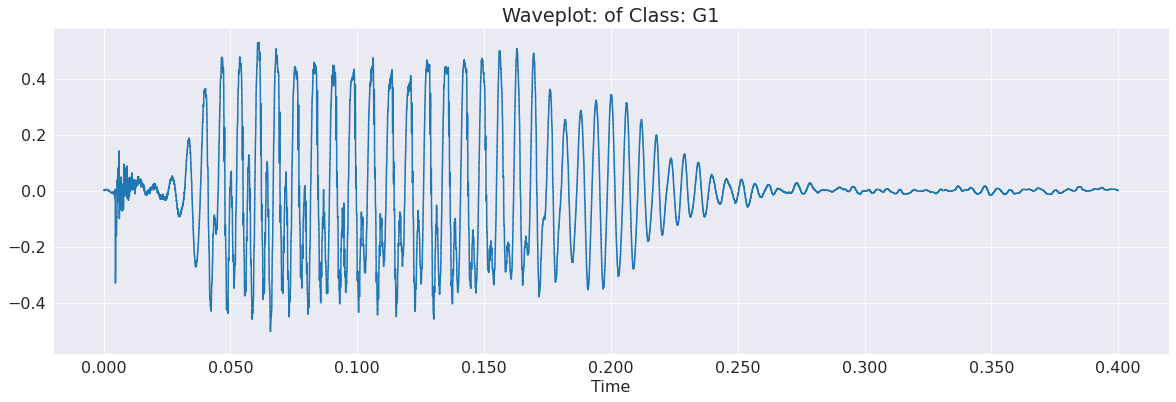

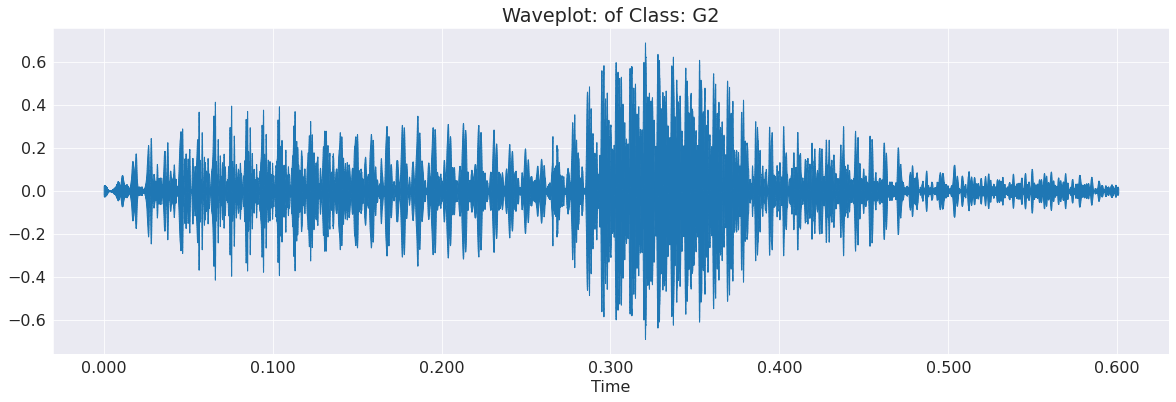

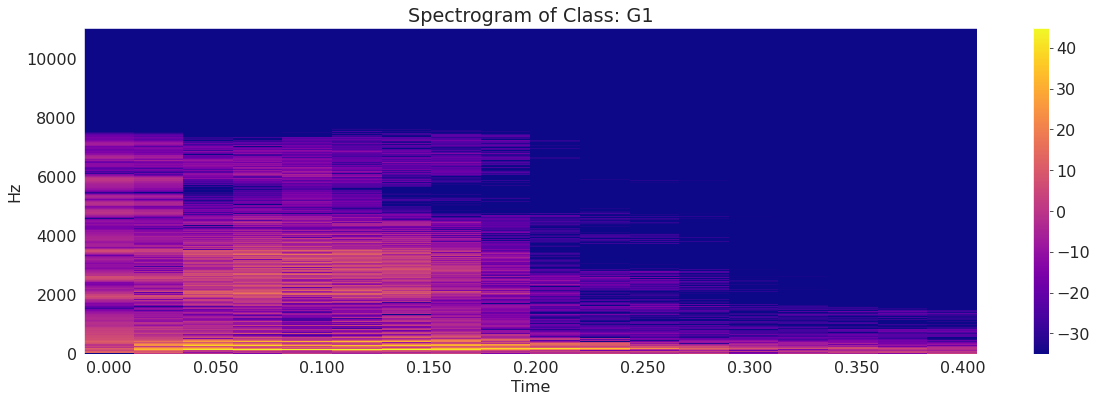

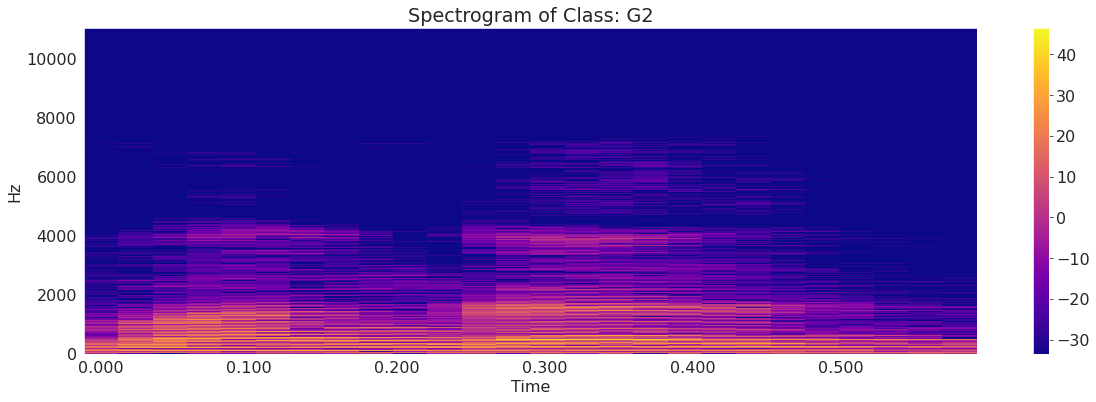

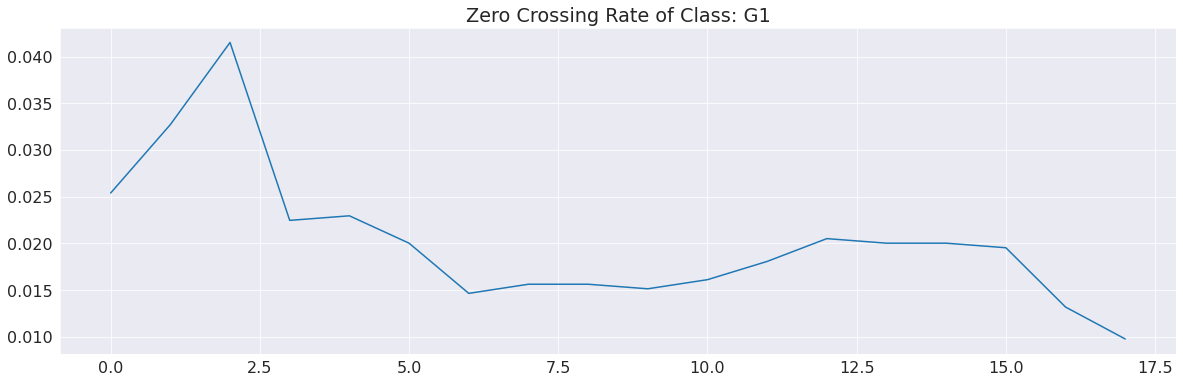

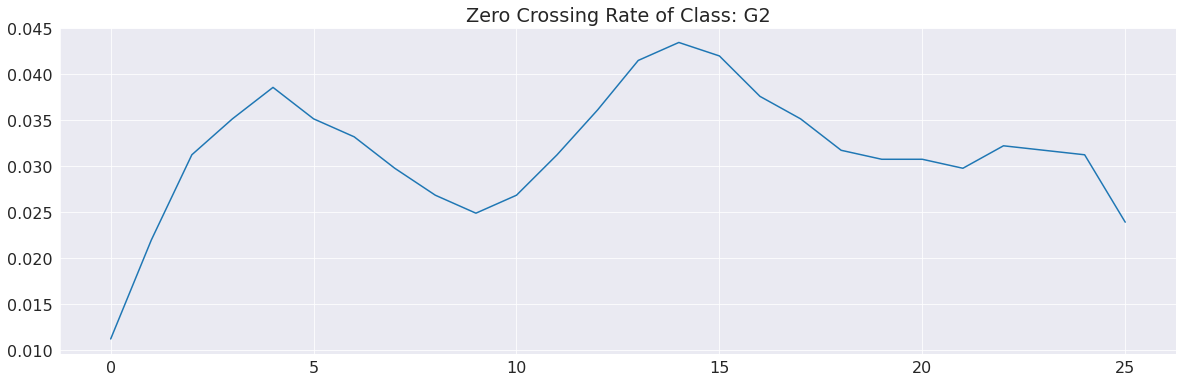

In [9]:
sample1 = data[data['age_group']=='G1'].sample(1).iloc[0].filepath
sample2 = data[data['age_group']=='G2'].sample(1).iloc[0].filepath

show_waveplot(sample1,'G1')
show_waveplot(sample2,'G2')

show_spectrogram(sample1,'G1')
show_spectrogram(sample2,'G2')

show_zcr(sample1,'G1')
show_zcr(sample2,'G2')

## Native Speaker Samples

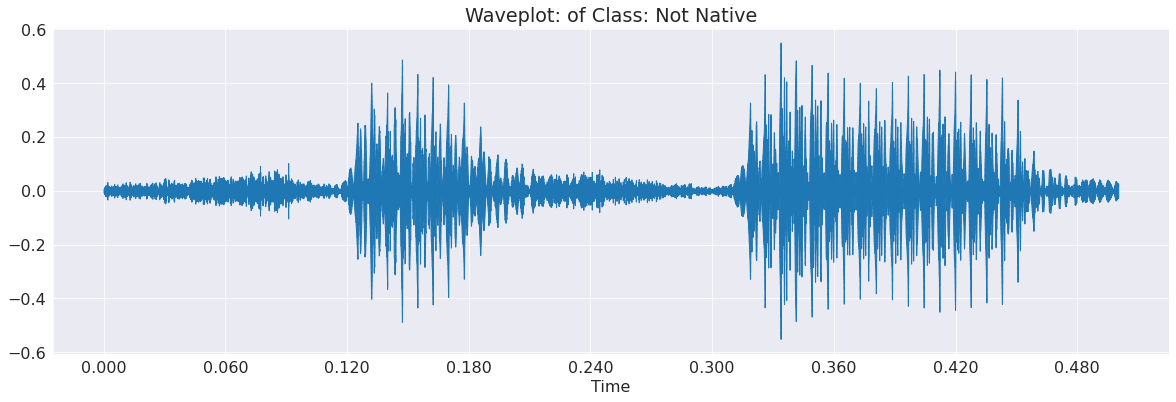

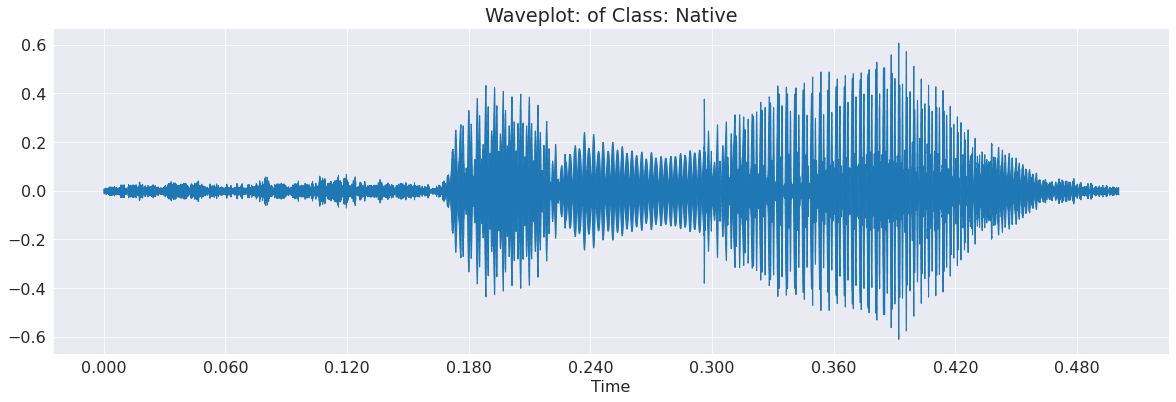

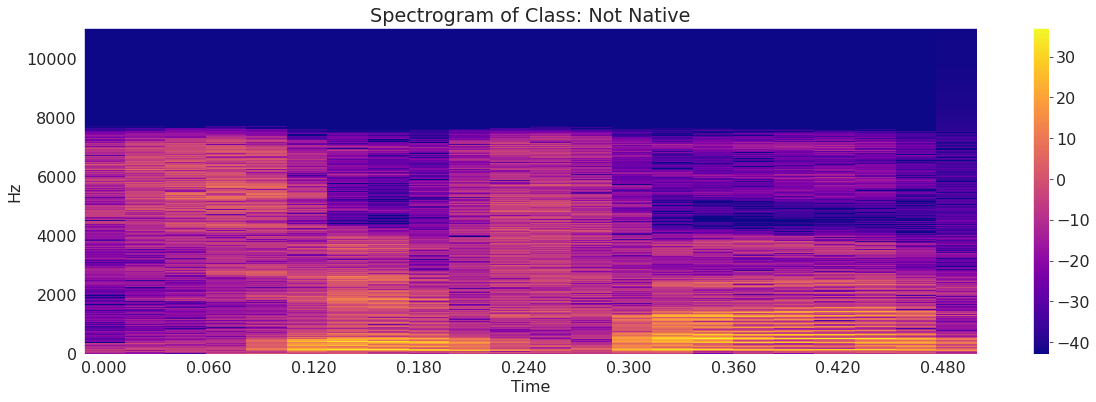

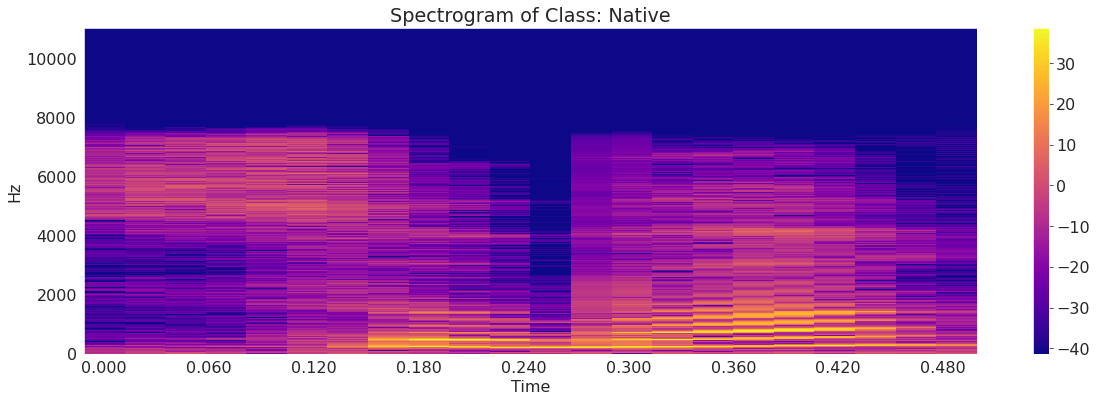

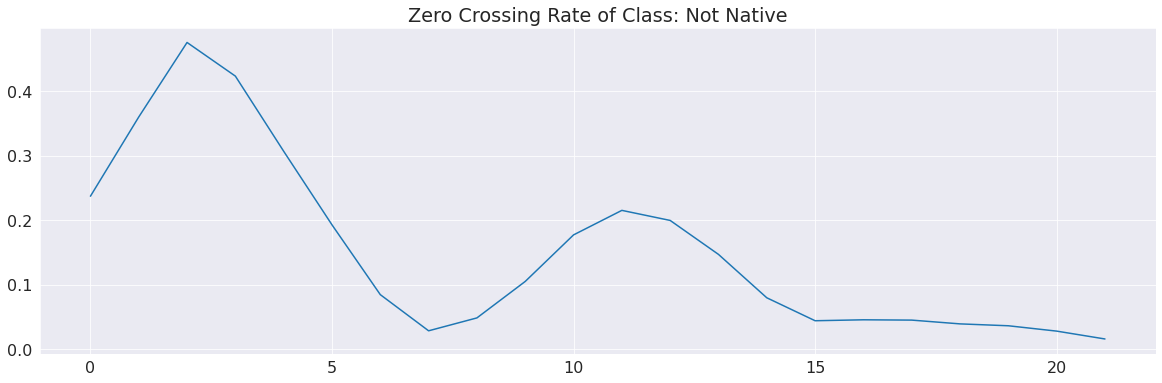

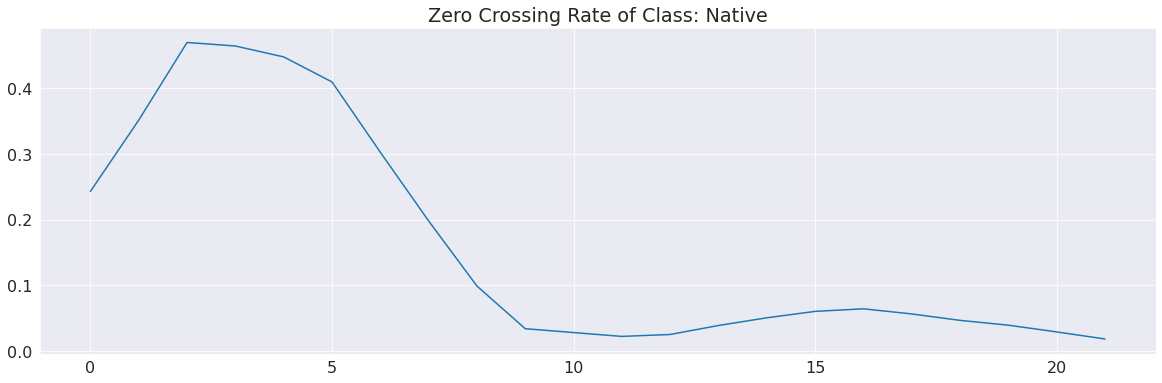

In [10]:
sample1 = data[data['native']=='N'].sample(1).iloc[0].filepath
sample2 = data[data['native']=='Y'].sample(1).iloc[0].filepath

show_waveplot(sample1,'Not Native')
show_waveplot(sample2,'Native')

show_spectrogram(sample1,'Not Native')
show_spectrogram(sample2,'Native')

show_zcr(sample1,'Not Native')
show_zcr(sample2,'Native')

<div class='alert alert-success'><strong>Inference:</strong> There are a few noticeable differences but nothing concrete enough to summarize, but lets try to capture the underlying patterns by using some ML and DL based modelling techniques.</div>

# Feature Extraction
- Lets shuffle the speakers in the data and extract the features from the audio files
- Here is a good blog that explains the MFCC process in layman's terms: https://www.analyticsvidhya.com/blog/2021/06/mfcc-technique-for-speech-recognition/ 

<img src='https://miro.medium.com/max/1400/1*ObZV1Ay9CTH4YJPySIPpWA.png'>

In [256]:
speakers = data['speaker'].unique().tolist()
random.shuffle(speakers)

frames = []
for speaker in speakers:
    frames.append(data[data['speaker']==speaker])
data = pd.concat(frames)
data.reset_index(drop=True,inplace=True)
data

,speaker,filepath,label,gender,age_group,native
0,AA,../input/urdu-speech-dataset/files/AAMNG1/AAMN...,8,M,G1,N
1,AA,../input/urdu-speech-dataset/files/AAMNG1/AAMN...,15,M,G1,N
2,AA,../input/urdu-speech-dataset/files/AAMNG1/AAMN...,4,M,G1,N
3,AA,../input/urdu-speech-dataset/files/AAMNG1/AAMN...,6,M,G1,N
4,AA,../input/urdu-speech-dataset/files/AAMNG1/AAMN...,17,M,G1,N
...,...,...,...,...,...,...
145,AB,../input/urdu-speech-dataset/files/ABMNG1/ABMN...,3,M,G1,N
146,AB,../input/urdu-speech-dataset/files/ABMNG1/ABMN...,18,M,G1,N
147,AB,../input/urdu-speech-dataset/files/ABMNG1/ABMN...,4,M,G1,N
148,AB,../input/urdu-speech-dataset/files/ABMNG1/ABMN...,6,M,G1,N


In [257]:
speakers

['AA', 'AE', 'AI', 'AK', 'AH', 'AJ', 'AF', 'AC', 'AG', 'AB']

## Extracting 64 Cepstral Coefficients

<div class='alert alert-info'><strong>Note:</strong> In cases where the number of features are much higher than the number of samples in your input data, your model is bound to overfit due to the complexity of the model as well as the lack of data availability. In these scenarios it is a good idea to consider the regularization techniques, dimensionality reduction techniques or limiting the features in your feature extraction process itself.</div>

- Since the number of records is quite less, it would be good idea to consider lesser cepstral coefficients as our input features.

In [258]:
def feature_extraction(df):
    features = []
    for i,record in tqdm(df.iterrows(),total=df.shape[0]):
        try:
            x , sr = librosa.load(record['filepath'],sr=16000)
            mean_mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=64),axis=1)
            features.append(mean_mfcc)
        except EOFError:
            pass
        
    dataf = pd.DataFrame(features)
    dataf['class'] = df['label']
    return dataf

In [259]:
dataf = feature_extraction(data)

100%|██████████| 150/150 [00:01<00:00, 89.46it/s]


## Final Features for ML Models

In [260]:
dataf

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,class
0,-275.750671,75.449814,34.941452,12.307894,7.638651,12.925909,-10.421322,-20.915268,5.318419,11.258857,...,4.280539,-2.378663,-1.308141,1.578113,3.715431,-1.935246,-6.249235,-3.000239,0.018725,8
1,-246.846420,134.275909,-10.408148,49.406609,-3.361596,-5.324429,6.823467,-35.111496,-8.839994,-15.822477,...,-0.343532,-3.354620,-2.534005,-1.984076,0.194002,0.842016,-5.807712,-3.200792,-0.796218,15
2,-333.057129,88.285873,44.394913,58.588604,0.792989,-8.794794,19.616121,-12.914248,-8.934139,-14.585471,...,-5.316558,-2.235126,3.085253,-0.364140,-4.144041,-4.535532,2.436637,-1.426242,-7.661493,4
3,-263.694641,88.177979,3.348660,42.747910,-7.074619,7.559173,17.416157,-22.259832,7.547353,-6.126669,...,4.208039,-3.418531,-0.829946,-2.017304,3.734063,-1.053460,-6.850530,-2.415347,0.620425,6
4,-213.738907,135.262741,3.789102,41.948231,16.731110,1.334842,1.710359,-16.888409,0.813005,11.210712,...,5.723689,3.153752,-2.654026,-7.138132,-2.376769,1.767796,-2.112801,-6.192673,-2.018282,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-281.752411,125.058235,28.223324,17.172758,-23.701963,12.051303,17.824469,-43.913681,-3.023062,-24.197449,...,-2.731814,-5.004476,-1.865388,-1.554993,-3.254865,-6.279125,-3.281280,-5.195348,-3.512707,3
146,-249.141937,86.880516,19.020859,18.756824,-11.472495,12.361886,-0.759080,-23.372423,7.651772,-10.406025,...,-1.842466,-3.320913,-3.530966,-1.175695,-2.454919,-4.810331,-3.878509,-4.481999,-4.348814,18
147,-286.998901,79.133514,42.837738,94.520447,-16.261166,-8.021126,10.319855,-35.059525,-1.540714,-26.700451,...,-5.469305,-5.593472,-3.562926,-0.555707,-5.879294,-6.534119,-5.867452,-3.376876,-6.141607,4
148,-230.577667,119.555756,-19.857471,34.033577,-1.208441,0.621990,14.269714,-15.460162,-4.737518,-6.893163,...,-1.315916,-7.218683,-6.353944,-7.619503,-4.552104,-6.455077,-5.674592,-7.005749,-7.893373,6


# Modelling
- Lets try a bunch of models: Linear, Tree based, Non Linear, Convolutional 1D

<img src='https://miro.medium.com/max/1400/1*xIXqf46yYonSXkUOWcOCvg.gif'>

In [261]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score
import joblib

In [262]:
X = dataf.iloc[:,:-1].values
y = dataf.iloc[:,-1].values

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_val, y_train, y_val = X[:-30,:],X[-30:,:],y[:-30],y[-30:]

In [263]:
def model_train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred_tr = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("--------------------Training Performance---------------------")
    print(classification_report(y_train,y_pred_tr))
    print("-------------------------------------------------------------")
    print("--------------------Testing Performance----------------------")
    print(classification_report(y_test,y_pred))
    
    plt.figure(figsize=(12,10))
    sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.4g',
            xticklabels=np.unique(y_train),yticklabels=np.unique(y_train))
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

## Logistic Regression

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00         8
           3       1.00      0.88      0.93         8
           4       1.00      0.88      0.93         8
           5       1.00      0.88      0.93         8
           6       0.89      1.00      0.94         8
           7       0.67      1.00      0.80         8
           8       1.00      0.88      0.93         8
           9       0.89      1.00      0.94         8
          10       1.00      0.88      0.93         8
          11       1.00      1.00      1.00         8
          12       0.86      0.75      0.80         8
          13       1.00      0.88      0.93         8
          14       0.88      0.88      0.88         8

    accuracy                           0.93       120
   macro avg      

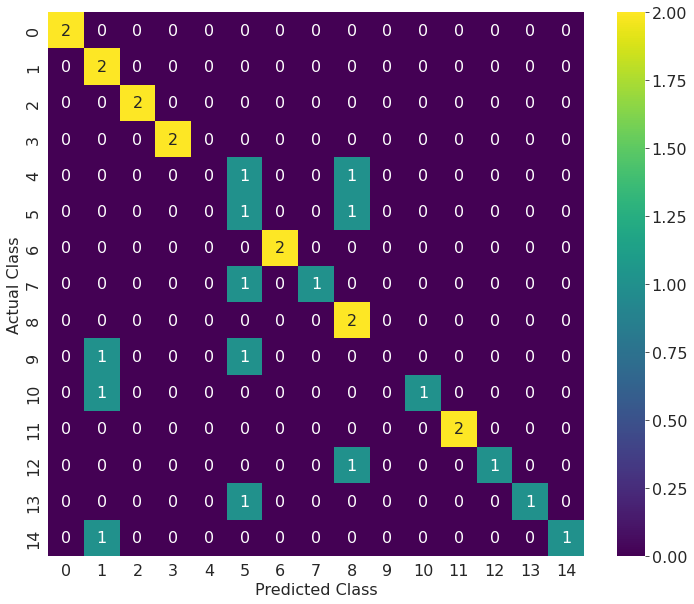

['logistic']

In [282]:
model = LogisticRegression(C=0.001)
model_train(model,X_train,X_val,y_train,y_val)
joblib.dump(model , 'logistic')

## Random Forest

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       0.89      1.00      0.94         8
          12       1.00      0.88      0.93         8
          13       1.00      0.88      0.93         8
          14       0.80      1.00      0.89         8

    accuracy                           0.97       120
   macro avg      

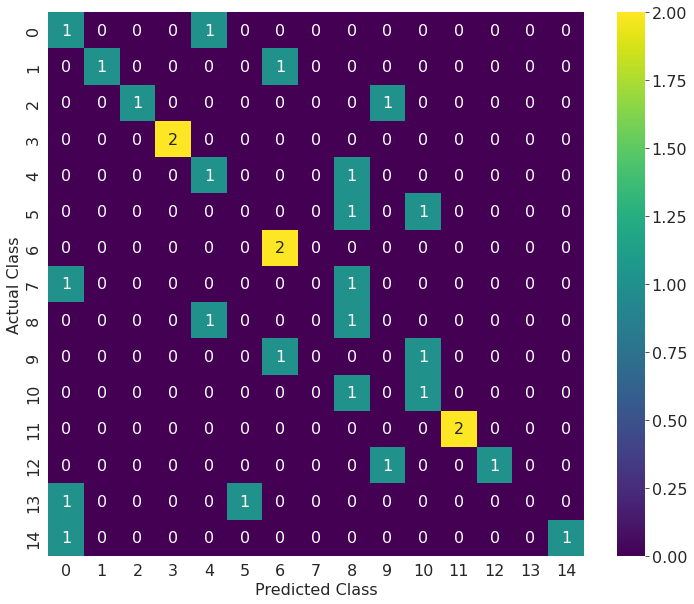

['rf']

In [283]:
model = RandomForestClassifier(max_depth=3,random_state=101)
model_train(model,X_train,X_val,y_train,y_val)
joblib.dump(model , 'rf')

## XGBoost

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8

    accuracy                           1.00       120
   macro avg      

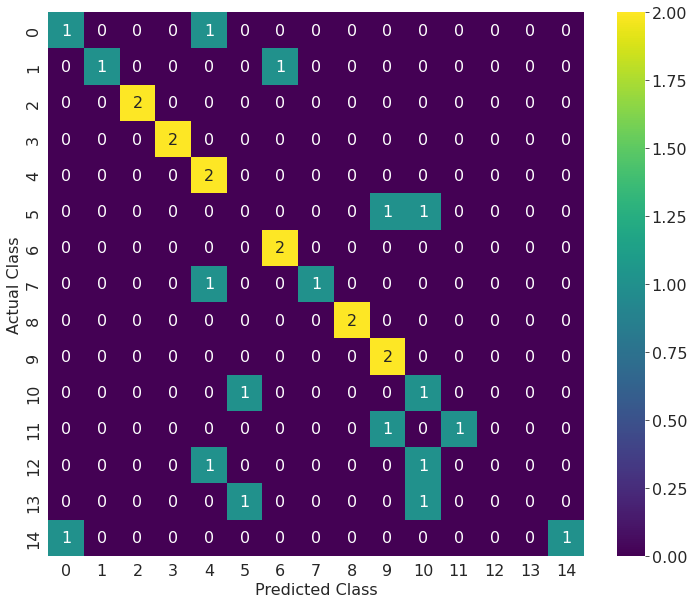

['xgb']

In [284]:
model = xgb.XGBClassifier(n_estimators=70,max_depth=4)
model_train(model,X_train,X_val,y_train,y_val)
joblib.dump(model , 'xgb')

## Non Linear SVM

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.78      0.88      0.82         8
           2       1.00      0.88      0.93         8
           3       0.89      1.00      0.94         8
           4       0.86      0.75      0.80         8
           5       0.57      0.50      0.53         8
           6       1.00      0.75      0.86         8
           7       0.78      0.88      0.82         8
           8       0.67      1.00      0.80         8
           9       0.86      0.75      0.80         8
          10       0.78      0.88      0.82         8
          11       1.00      1.00      1.00         8
          12       0.71      0.62      0.67         8
          13       1.00      0.75      0.86         8
          14       0.50      0.62      0.56         8

    accuracy                           0.81       120
   macro avg      

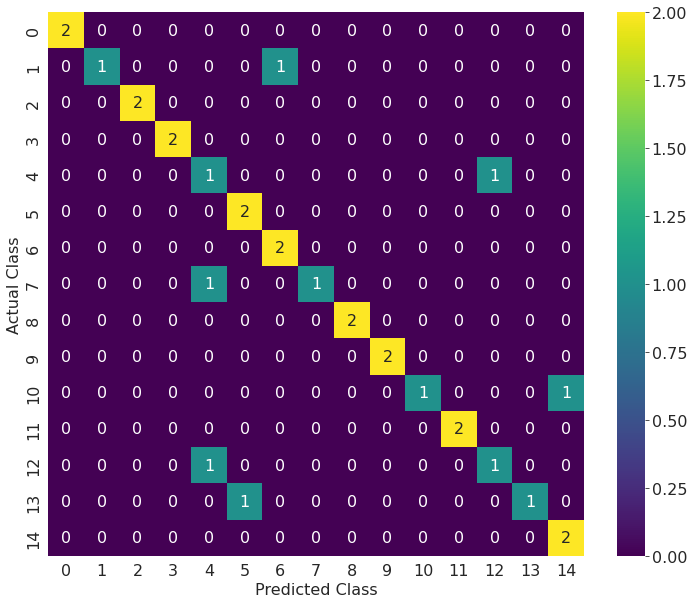

['svm_rbf']

In [285]:
model = SVC(C=10)
model_train(model,X_train,X_val,y_train,y_val)
joblib.dump(model , 'svm_rbf')

## Linear SVM

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       0.89      1.00      0.94         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      0.88      0.93         8
          13       1.00      0.88      0.93         8
          14       0.89      1.00      0.94         8

    accuracy                           0.98       120
   macro avg      

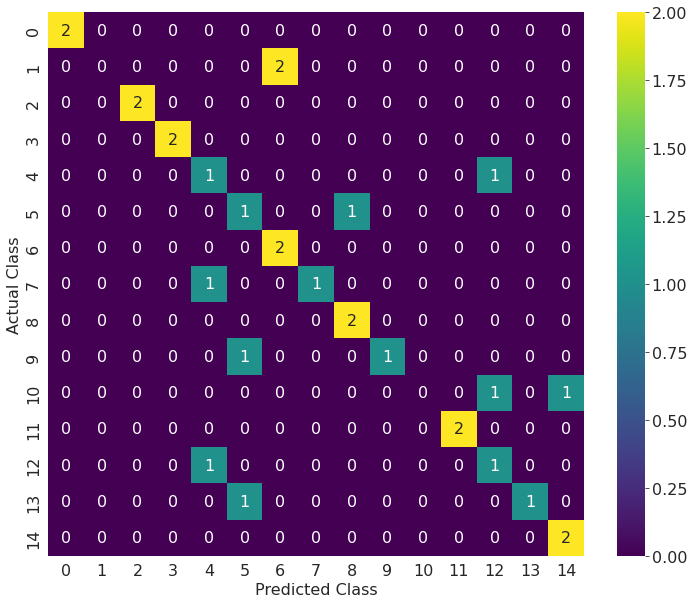

['svm_linear']

In [286]:
model = SVC(kernel='linear',C=0.001)
model_train(model,X_train,X_val,y_train,y_val)
joblib.dump(model , 'svm_linear')

## Feed-forward Neural Network

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8

    accuracy                           1.00       120
   macro avg      

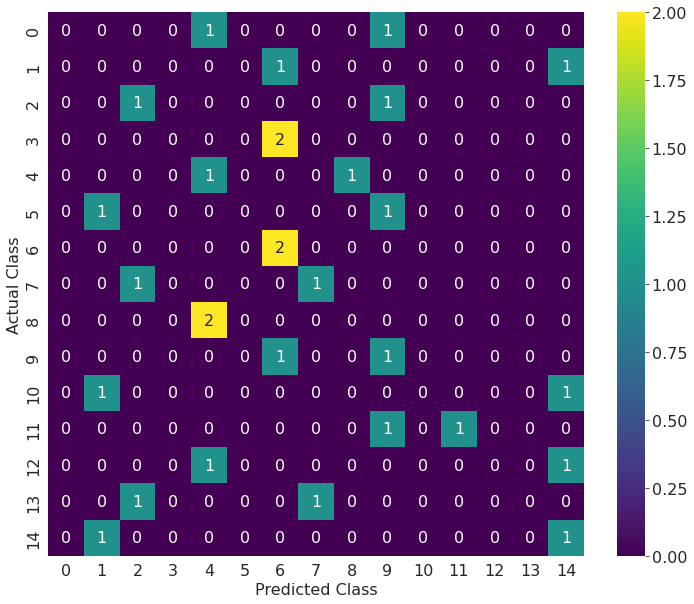

In [287]:
model = MLPClassifier(hidden_layer_sizes=(32,),random_state=42, max_iter=1000)
model_train(model,X_train,X_val,y_train,y_val)

## 1D Convolutional Neural Network

In [288]:
X_train_cnn = X_train.reshape(-1,64,1)
X_val_cnn = X_val.reshape(-1,64,1)

In [289]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv1D, MaxPooling1D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [290]:
model = Sequential([
    InputLayer(input_shape=(64, 1)),
    Conv1D(16, 11, activation='relu', padding = "same"),
    MaxPooling1D(3),
    Conv1D(32, 9, activation='relu', padding = "same"),
    MaxPooling1D(3),
    Conv1D(64, 7, activation='relu', padding = "same"),
    MaxPooling1D(3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(15, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 64, 16)            192       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 21, 16)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 21, 32)            4640      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 7, 32)             0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 7, 64)             14400     
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 2, 64)             0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)              

In [291]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [292]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [293]:
history = model.fit(X_train_cnn, y_train, epochs=50, validation_data=(X_val_cnn,y_val), callbacks=[checkpoint,earlystopping])

Epoch 1/50
4/4 [==============================] - 1s 93ms/step - loss: 6.6986 - accuracy: 0.0417 - val_loss: 4.1855 - val_accuracy: 0.0667

Epoch 00001: val_loss improved from inf to 4.18551, saving model to model.h5
Epoch 2/50
4/4 [==============================] - 0s 19ms/step - loss: 3.7708 - accuracy: 0.0667 - val_loss: 3.0566 - val_accuracy: 0.1333

Epoch 00002: val_loss improved from 4.18551 to 3.05663, saving model to model.h5
Epoch 3/50
4/4 [==============================] - 0s 18ms/step - loss: 3.1467 - accuracy: 0.1083 - val_loss: 2.8578 - val_accuracy: 0.2000

Epoch 00003: val_loss improved from 3.05663 to 2.85782, saving model to model.h5
Epoch 4/50
4/4 [==============================] - 0s 18ms/step - loss: 2.7327 - accuracy: 0.1417 - val_loss: 2.5133 - val_accuracy: 0.1000

Epoch 00004: val_loss improved from 2.85782 to 2.51331, saving model to model.h5
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 2.4058 - accuracy: 0.2000 - val_loss: 2.3386 - va

In [294]:
y_pred = model.predict(X_val_cnn)
y_pred = np.argmax(y_pred,axis=1)

print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.50      0.67         2
           2       0.67      1.00      0.80         2
           3       1.00      0.50      0.67         2
           4       0.29      1.00      0.44         2
           5       0.00      0.00      0.00         2
           6       0.50      0.50      0.50         2
           7       1.00      0.50      0.67         2
           8       0.67      1.00      0.80         2
           9       0.33      0.50      0.40         2
          10       0.33      0.50      0.40         2
          11       1.00      0.50      0.67         2
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         2
          14       1.00      0.50      0.67         2

    accuracy                           0.53        30
   macro avg       0.65      0.53      0.53        30
weighted avg       0.65   

# Model Inference

- My custom input sequence is Subah, Dopahar, Mangal, Budh
- A window is slided over the audio signal so that we convert the audio within each window into MFCC features and then predict the label to recognize the word
- Window size is determined on the basis of sampling rate, length of the audio and average time length of each word

<img src='https://global-uploads.webflow.com/5fac161927bf86485ba43fd0/6229d40f625c70840c12bcd7_BlogGif_2.gif'>

## Input Audio

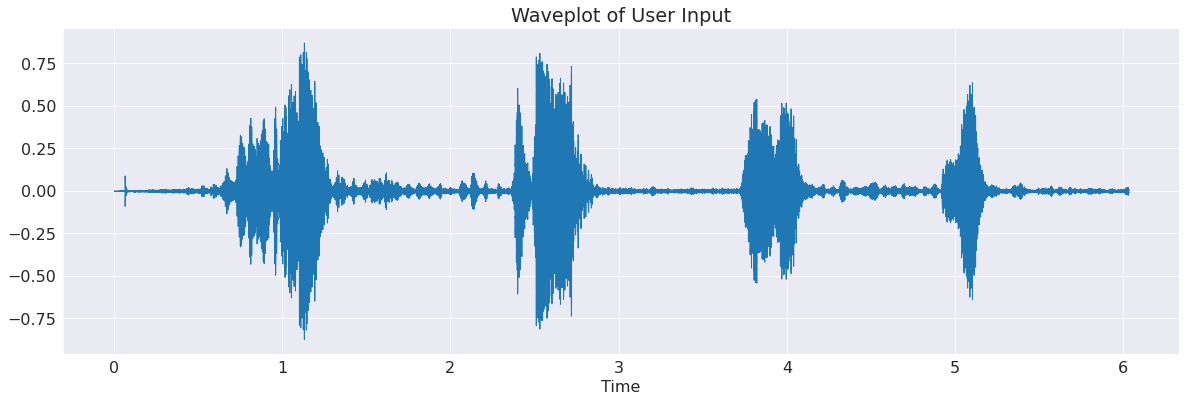

In [303]:
urdu_input = '../input/urduspeechsequence/urdu_speech_inp.wav'

x , sr = librosa.load(urdu_input,sr=16000)
plt.figure(figsize=(20, 6))
librosa.display.waveshow(x, sr=sr)
plt.title(f"Waveplot of User Input")
plt.show()

## Sampling Rate and Time Window

In [304]:
total_time = x.shape[0]/sr
per_window = x.shape[0]/total_time
total_time, per_window

(6.03, 16000.0)

In [318]:
def model_inference(model_name):
    encodings_to_urdu = {1:'sifar',2:'ek',3:'do',4:'teen',5:'chaar',6:'paanch',7:'che',
                     8:'saath',9:'aath',10:'nau',15:'mangal',16:'budh',17:'jumeraat',
                     18:'subah',19:'dopahar'}
    x , sr = librosa.load(urdu_input,sr=16000)
    svm = joblib.load(model_name)
    window_size = 25000
    for i in range(0,x.shape[0]+1,window_size):
        mfccs = librosa.feature.mfcc(y=x[i:i+window_size], sr=sr, n_mfcc=64)
        mfccs = np.mean(mfccs,axis=1)
        pred = svm.predict(mfccs.reshape(1,-1))
        result = encoder.classes_[pred][0]
        plt.figure(figsize=(20, 6))
        plt.title(f'Waveplot: {encodings_to_urdu[result]}')
        librosa.display.waveshow(x[i:i+window_size], sr=sr)
        plt.show()

## Non Linear SVM

<div class='alert alert-warning'><strong>Note:</strong> Here all the words are getting predicted into a single class therefore the predictions that turn out to be correct are not to be inferred positively.</div>

- Apparently the best performing model has performed the worst, all the words have been recognized as budh
- Budh occurs only once in the input

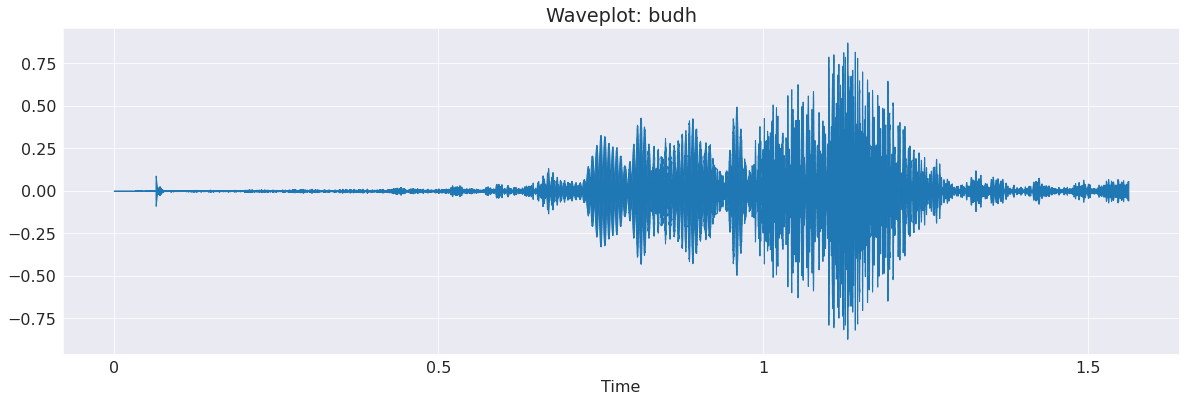

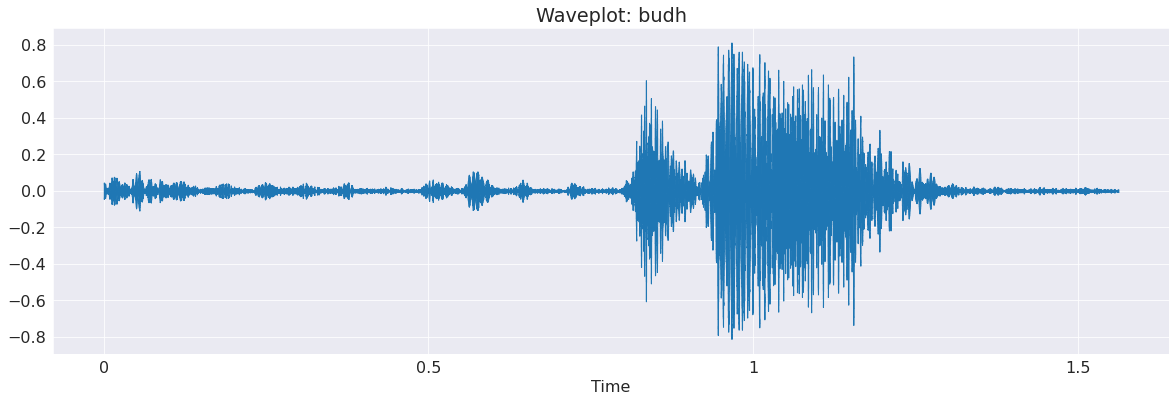

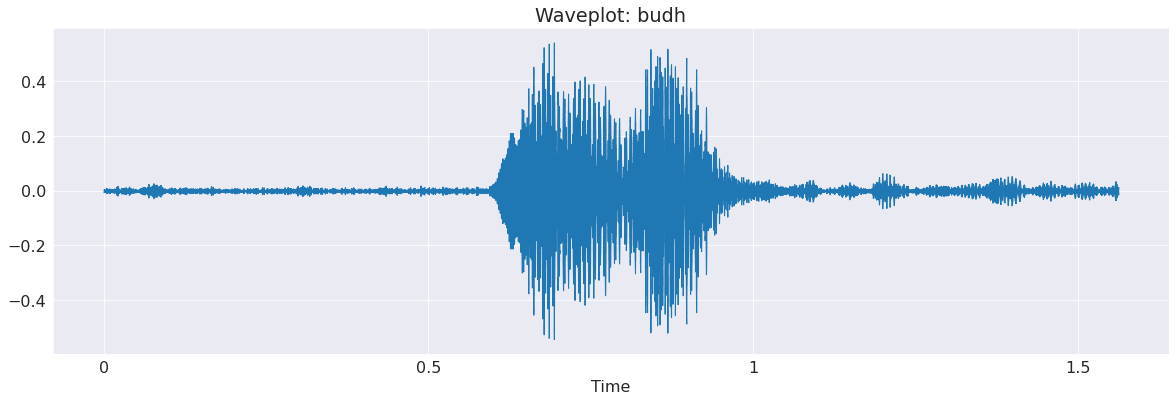

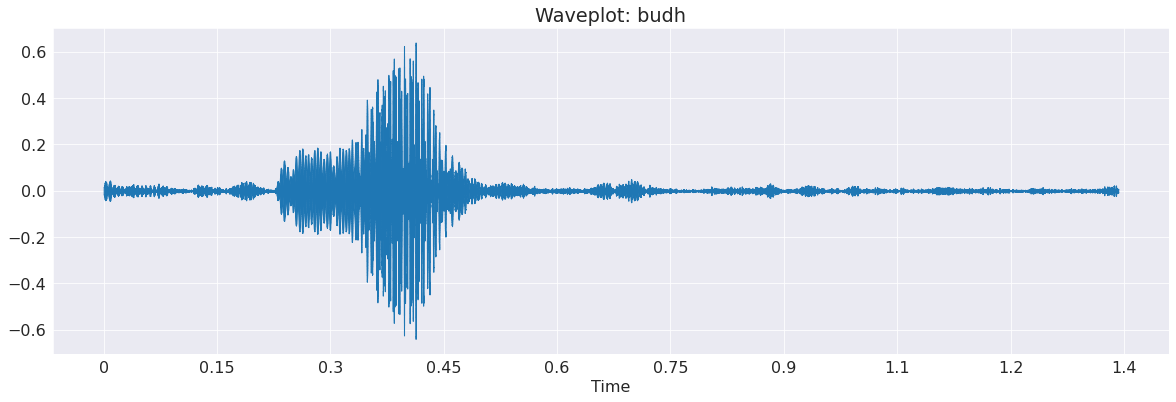

In [319]:
model_inference("svm_rbf")

## Logistic Regression
- Budh gets classifier correctly
- Budh occurs only once in the input

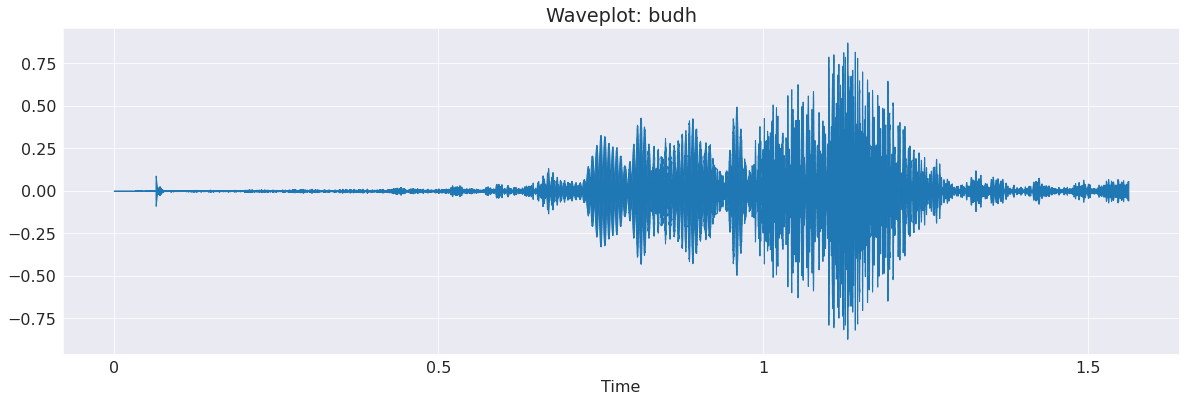

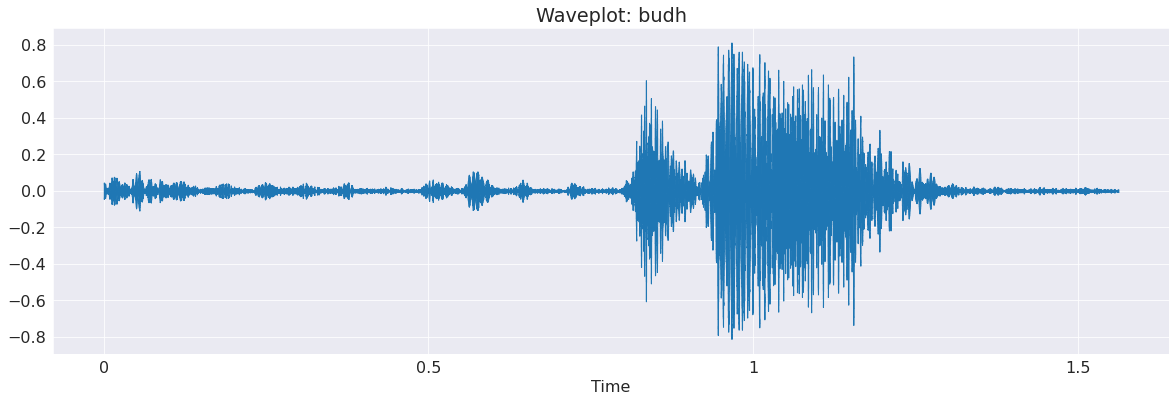

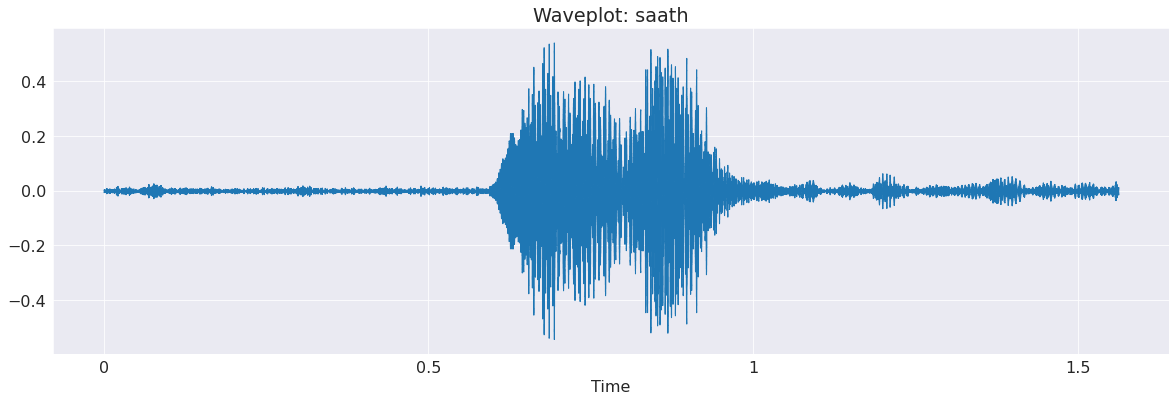

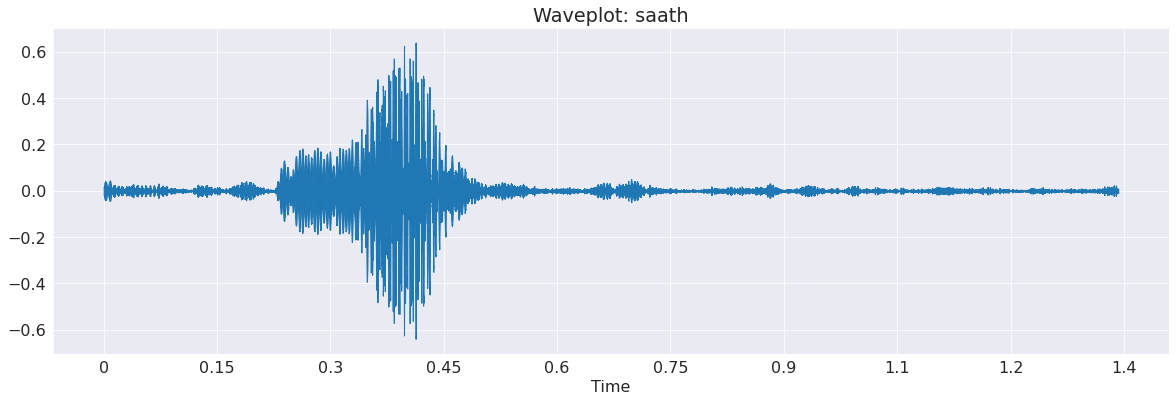

In [320]:
model_inference("logistic")

## Random Forest
- Dopahar and Budh get correctly recognized
- Budh occurs only once in the input though

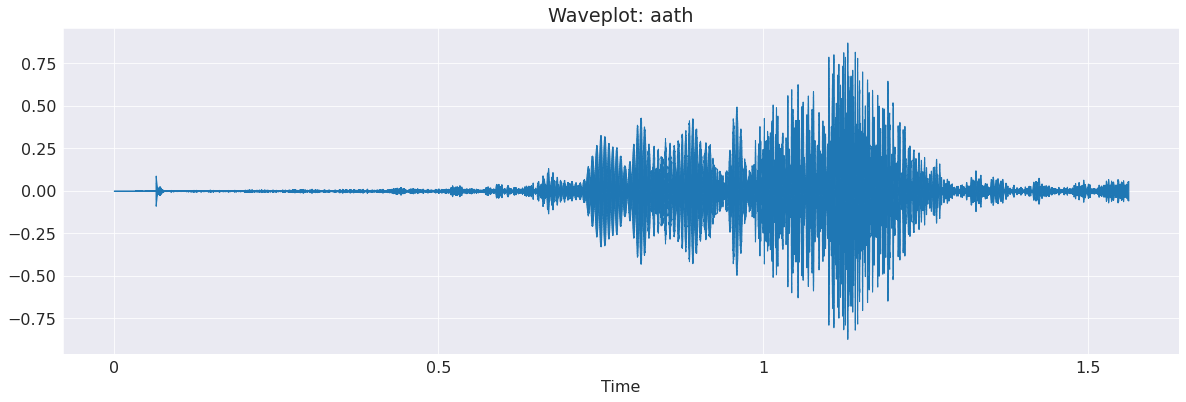

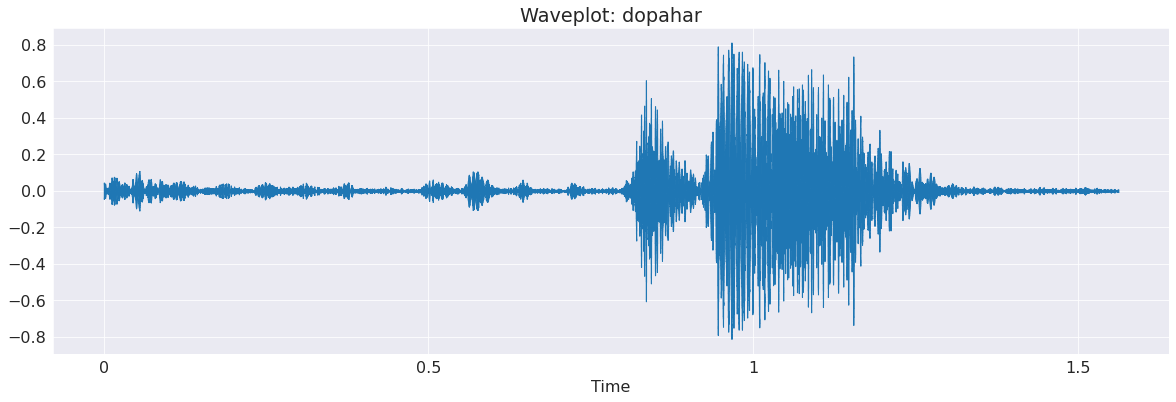

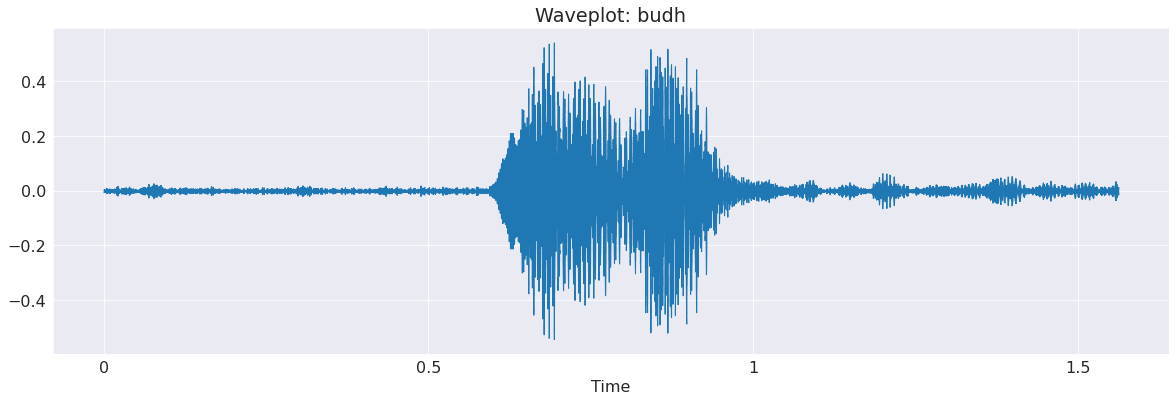

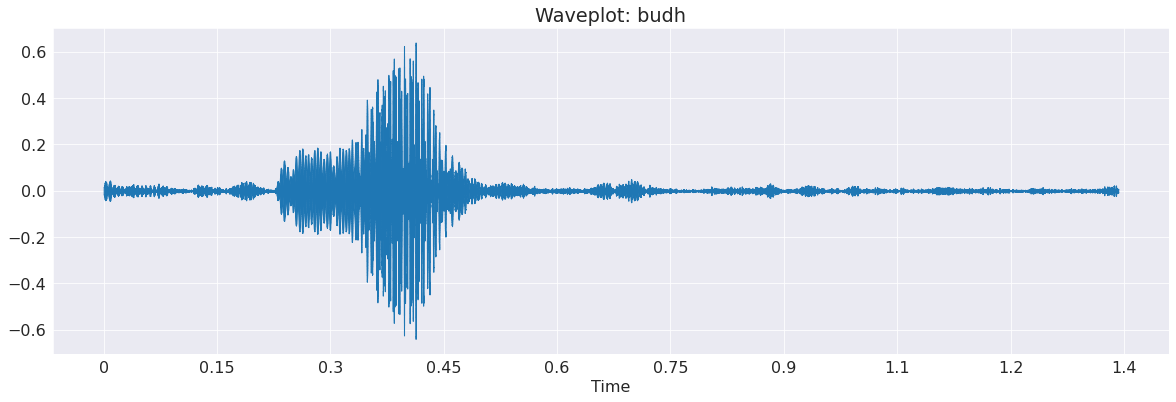

In [321]:
model_inference("rf")

## XGBoost
- Subah gets recognized correctly

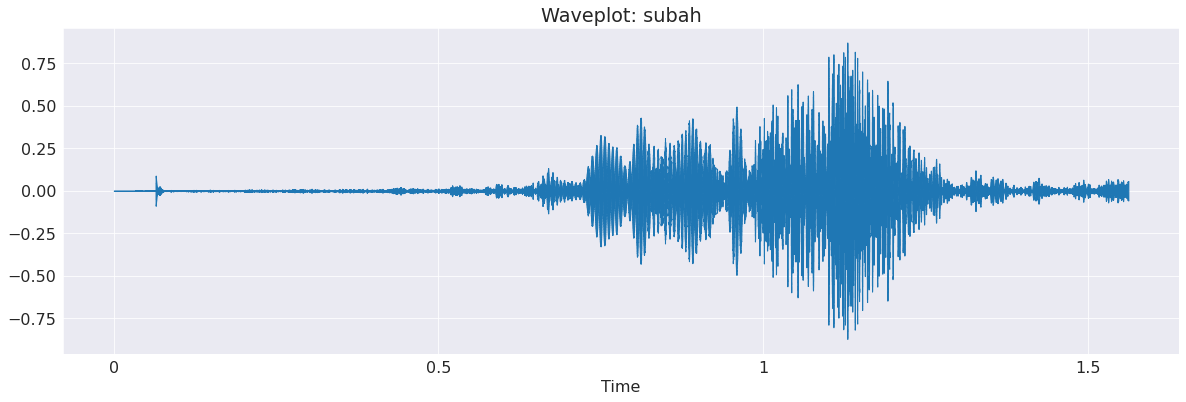

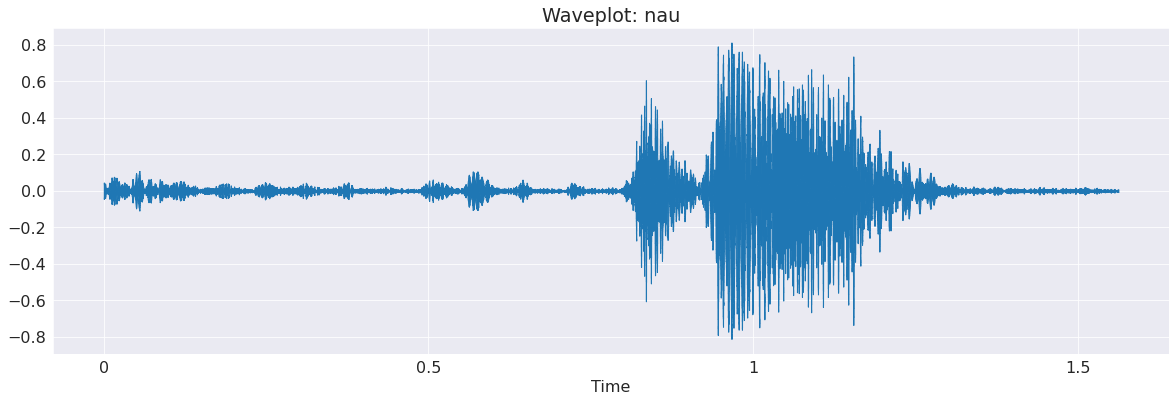

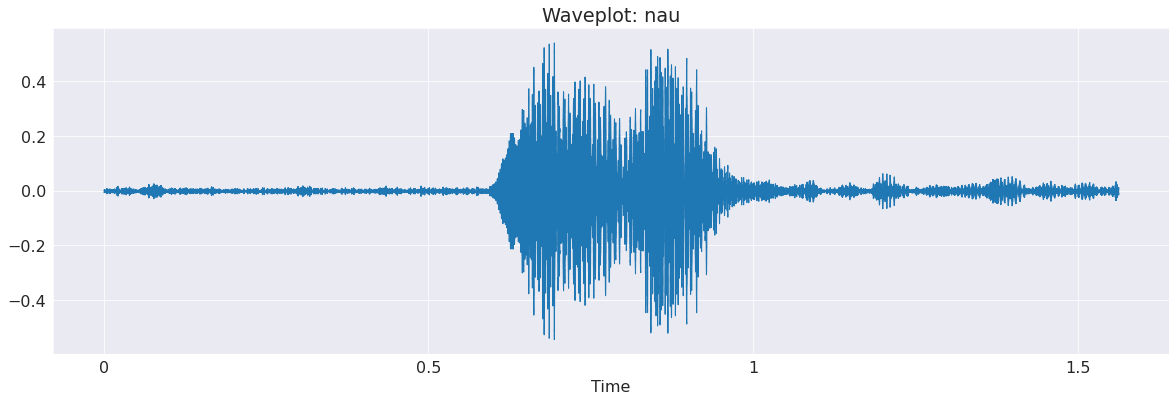

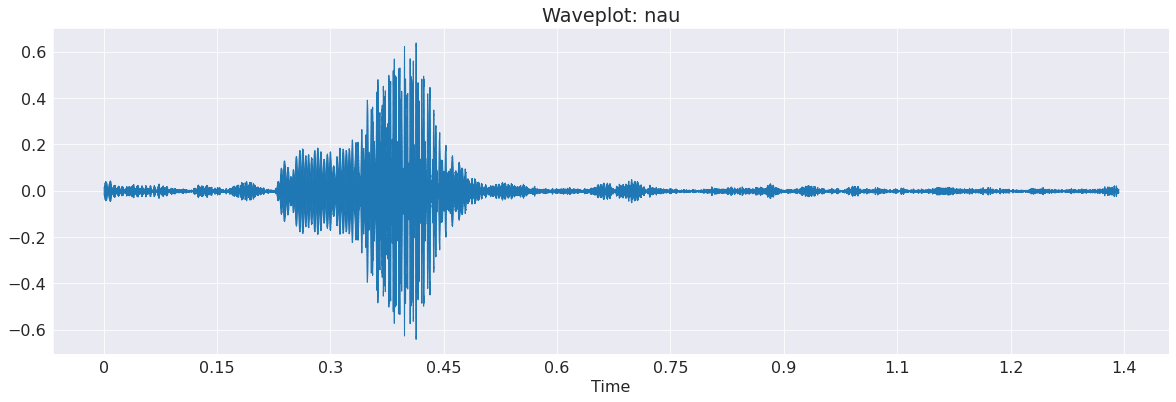

In [322]:
model_inference("xgb")

## Linear SVM

<div class='alert alert-warning'><strong>Note:</strong> Here all the words are getting predicted into a single class therefore the predictions that turn out to be correct are not to be inferred positively.</div>

- Gets everything wrong except for budh, but that is probably because every word in the audio is inferred as Budh

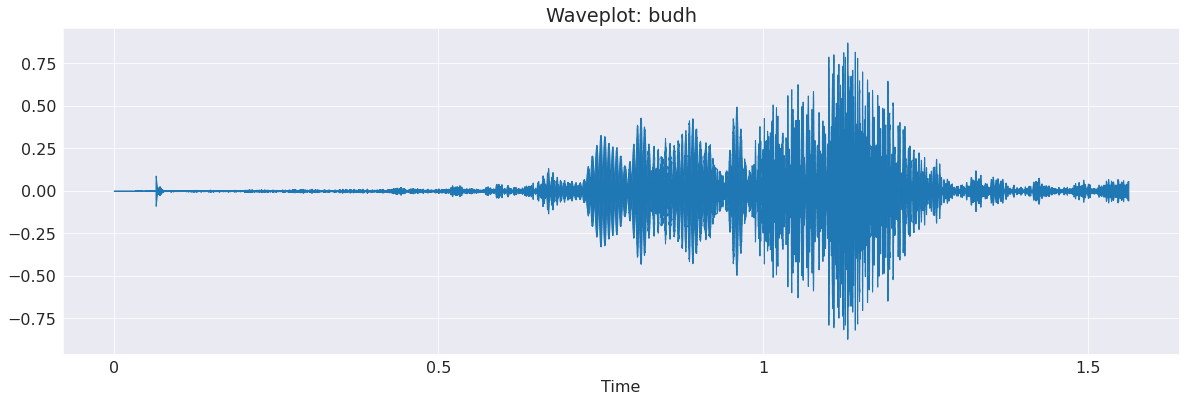

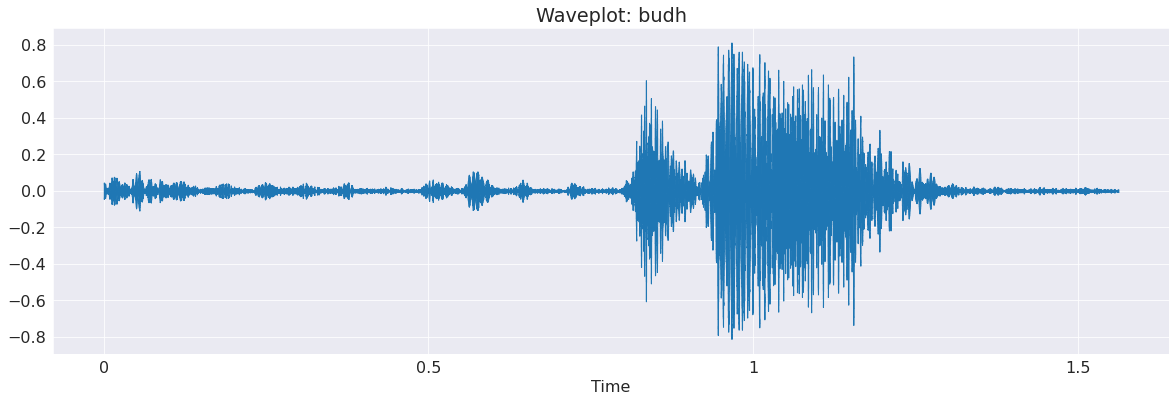

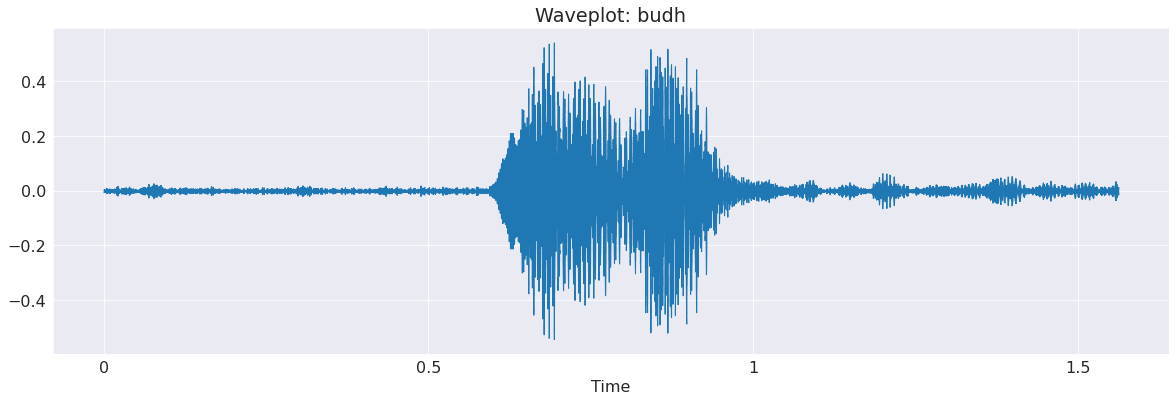

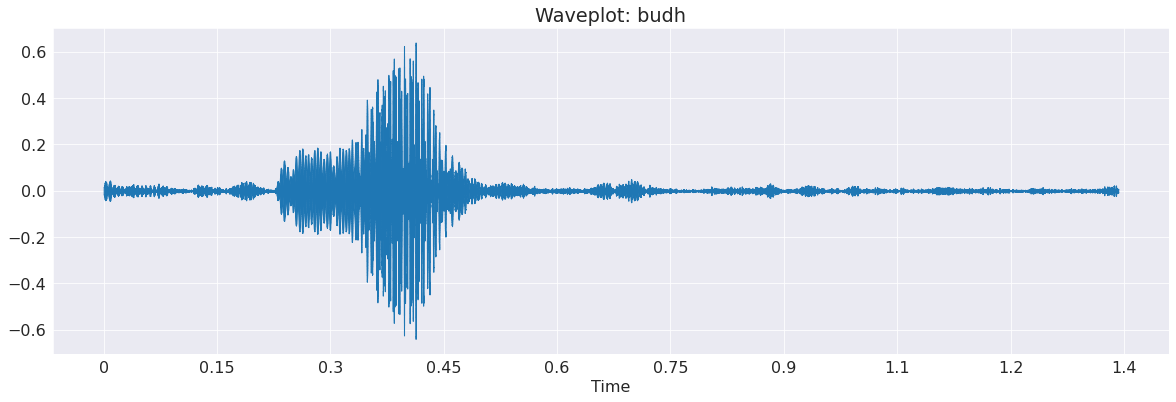

In [323]:
model_inference("svm_linear")

<div class='alert alert-success'><strong>Conclusion:</strong>
    <li>One might think of ensembling these models but if we look at the hard voting of each model we will end up getting the same incorrect label, <strong>soft voting</strong> can be attempted and evaluated.</li>
    <li>The custom input has a lot of <strong>background noise present</strong>, whereas the data on which our models are trained on do not have any noise present.</li>
    <li><strong>The data available is very less.</strong> More number of speakers will be required to build a robust model that will be able to recogonize words by considering the different accents, dialects and pronunications.</li>
</div>